# Data Preparation on Wind and Solar data set

- Transform certain features to correct scale and data type
- Analysing whether to remove features based on the missingness and correlation

In [51]:
import geopandas as gpd
import missingno as msno
import re

In [52]:
raw_wind_gdf = gpd.read_parquet('../../data/solar_wind/nl_wind_geom_CRS84.parquet')
raw_solar_gdf = gpd.read_parquet('../../data/solar_wind/nl_solar_geom_CRS84.parquet')

wind_gdf = raw_wind_gdf.copy()
solar_gdf = raw_solar_gdf.copy()

## Visualization of nullity by column and information sharing

Nullity

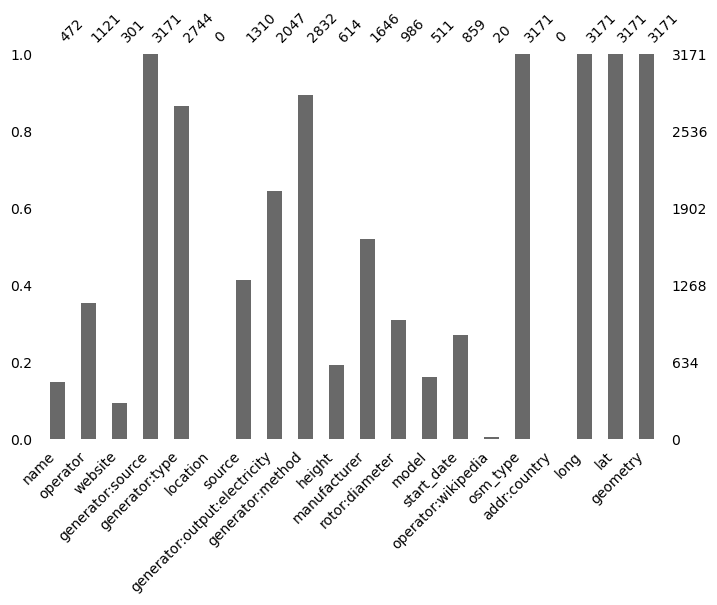

In [53]:
msno.bar(wind_gdf, figsize=(8,5), fontsize=10);

Information sharing

To what extent does a column (row-wise) share information with another? E.g. column 'operator:wikipedia' ($y_1$, y-axis) does not share significant information with others, so it will probably be removed.

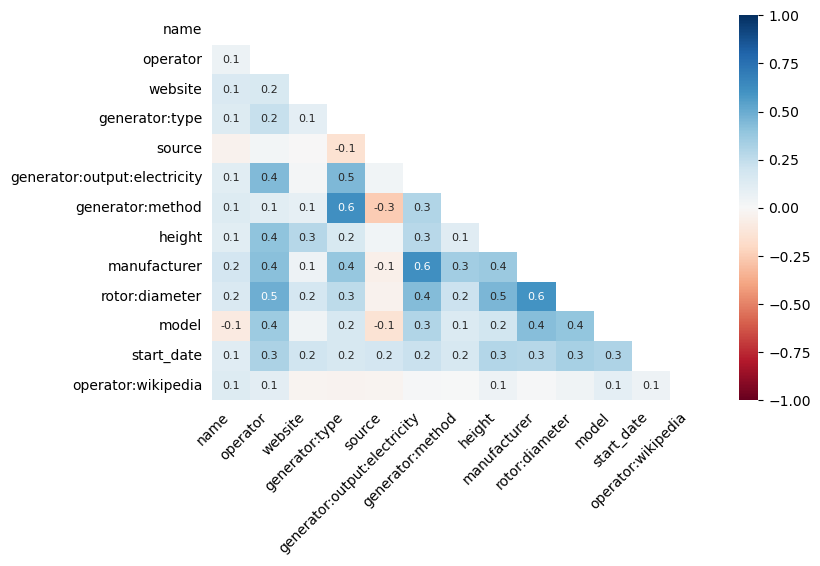

In [54]:
msno.heatmap(wind_gdf, figsize=(8,5), fontsize=10);

Nullity

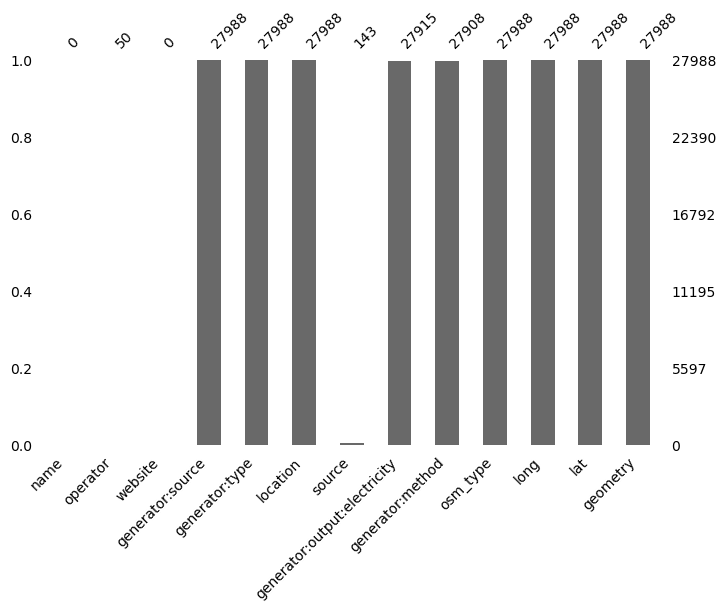

In [55]:
msno.bar(solar_gdf, figsize=(8,5), fontsize=10);

Information sharing

To what extent does a column (row-wise) share information with another

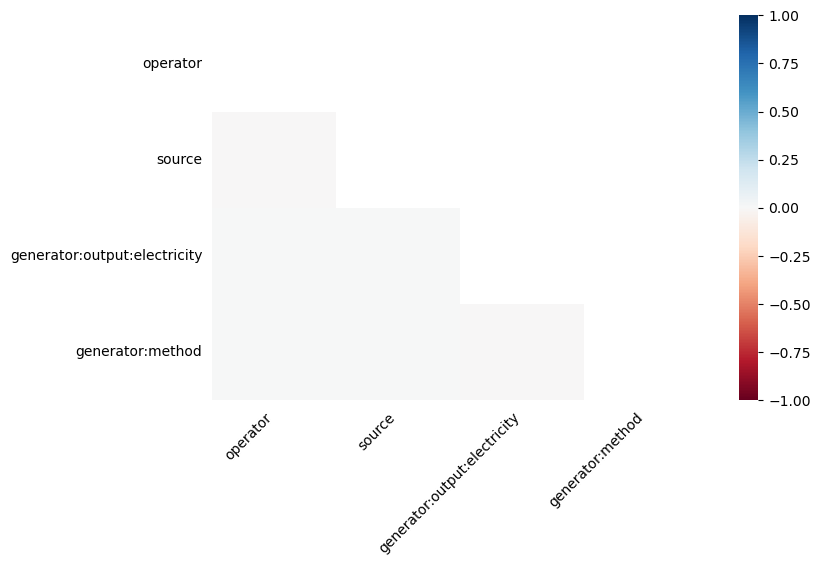

In [56]:
msno.heatmap(solar_gdf, figsize=(8,5), fontsize=10);

In [57]:
def get_non_zero_cols(df):
    """
    Obtain non zero columns
    :param df: data frame
    :return: non zero columns
    """
    nullity_counts = len(df) - df.isnull().sum()
    return list(nullity_counts[nullity_counts > 0].index)

Redefine cols for Solar

In [58]:
new_cols = get_non_zero_cols(solar_gdf)
solar_gdf = solar_gdf[new_cols]

Redefine cols for Wind

In [59]:
new_cols = get_non_zero_cols(wind_gdf)
wind_gdf = wind_gdf[new_cols]

## Analyze Solar

Validate non zero columns

In [60]:
solar_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27988 entries, 0 to 27987
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   operator                      50 non-null     object  
 1   generator:source              27988 non-null  object  
 2   generator:type                27988 non-null  object  
 3   location                      27988 non-null  object  
 4   source                        143 non-null    object  
 5   generator:output:electricity  27915 non-null  object  
 6   generator:method              27908 non-null  object  
 7   osm_type                      27988 non-null  object  
 8   long                          27988 non-null  float64 
 9   lat                           27988 non-null  float64 
 10  geometry                      27988 non-null  geometry
dtypes: float64(2), geometry(1), object(8)
memory usage: 2.3+ MB


### Analyze frequency of data by column and determine the importance to retain

Remove

In [61]:
solar_gdf.operator.value_counts()

BV Zonnepark Ameland    50
Name: operator, dtype: int64

Remove

In [62]:
solar_gdf['generator:source'].value_counts()

solar    27988
Name: generator:source, dtype: int64

Keep

In [63]:
solar_gdf['generator:type'].value_counts()

solar_photovoltaic_panel    27865
solar_thermal_collector       123
Name: generator:type, dtype: int64

Keep

In [64]:
solar_gdf.location.value_counts()

surface    27987
water          1
Name: location, dtype: int64

Remove

In [65]:
solar_gdf.source.value_counts()

local survey & PDOK 0.07 05-10-22    142
TripleSat                              1
Name: source, dtype: int64

Keep

In [66]:
solar_gdf['generator:output:electricity'].value_counts()

yes        27913
2.5 MW         1
14.1 MW        1
Name: generator:output:electricity, dtype: int64

Keep

In [67]:
solar_gdf['generator:method'].value_counts()

photovoltaic    27865
thermal            43
Name: generator:method, dtype: int64

?????

In [68]:
solar_gdf['osm_type'].value_counts()

way         27986
relation        2
Name: osm_type, dtype: int64

# Analyze Wind

Validate non zero columns

In [69]:
wind_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   name                          472 non-null    object  
 1   operator                      1121 non-null   object  
 2   website                       301 non-null    object  
 3   generator:source              3171 non-null   object  
 4   generator:type                2744 non-null   object  
 5   source                        1310 non-null   object  
 6   generator:output:electricity  2047 non-null   object  
 7   generator:method              2832 non-null   object  
 8   height                        614 non-null    object  
 9   manufacturer                  1646 non-null   object  
 10  rotor:diameter                986 non-null    object  
 11  model                         511 non-null    object  
 12  start_date                    859 non-nu

### Analyze frequency of data by column and determine the importance to retain

????

In [70]:
wind_gdf.name.value_counts()

N131 DELTA                13
Windpark Nieuwe Hemweg     6
N131/3900 Delta            6
De Horn                    6
E-92                       5
                          ..
BS1_J02                    1
BS1_J03                    1
BS1_J04                    1
BS1_J05                    1
OM-2.8                     1
Name: name, Length: 426, dtype: int64

Keep

In [71]:
wind_gdf.operator.value_counts()

Vattenfall              219
Eneco                    92
Vattenfall Nederland     69
Eneco Groep N.V.         60
Westermeerwind B.V.      48
                       ... 
Kaak                      1
HVC Groep                 1
UWind - Eneco             1
Wind Mediars b.v.         1
EAZ wind                  1
Name: operator, Length: 90, dtype: int64

Remove

In [72]:
wind_gdf.website.value_counts()

https://www.windplangroen.nl/                                                                                                                                  90
https://www.drentsemondenoostermoer.nl/                                                                                                                        38
https://www.windparkn33.nl/                                                                                                                                    35
https://www.windparkkrammer.nl/                                                                                                                                34
https://www.windcentrale.nl                                                                                                                                    12
https://www.zeeuwind.nl/locaties/willem-annapolder                                                                                                             10
https://drentsemondenoosterm

Remove

In [73]:
wind_gdf['generator:source'].value_counts()

wind    3171
Name: generator:source, dtype: int64

Remove

In [74]:
wind_gdf['generator:type'].value_counts()

horizontal_axis    2693
wind_turbine         49
vertical_axis         2
Name: generator:type, dtype: int64

Remove

In [75]:
wind_gdf.source.value_counts()

BAG                                                                                                                                   772
bing                                                                                                                                  240
Bing                                                                                                                                  112
https://www.defensie.nl/onderwerpen/berichten-aan-zeevarenden/inhoud/database/per-week?week=46&jaar=2015&1800series=true (*473/15)     38
MapBox Satellite                                                                                                                       16
http://www.zeeland.nl/digitaalarchief/zee0901277                                                                                       16
PDOK aerial imagery Beeldmateriaal.nl 25cm;https://zldgwb.zeeland.nl/geoloket/?Viewer=Windenergie                                      15
http://www.zeeland.nl/digitaalarch

Remove

In [76]:
wind_gdf['generator:method'].value_counts()

wind_turbine    2832
Name: generator:method, dtype: int64

??????

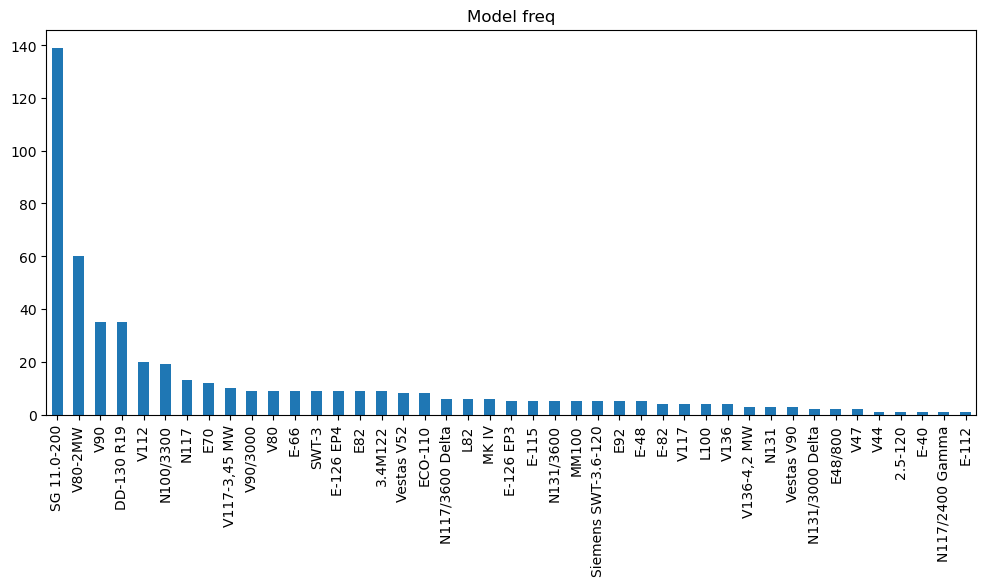

In [77]:
wind_gdf.model.value_counts().plot.bar(figsize=(12, 5), rot=90, title='Model freq');

????

In [78]:
print(wind_gdf.start_date.unique())

[None '2007-01' '2008' '2000' '2007' '2009' '2020' '1994' '2018' '1997-06'
 '2017' '2016' '2010' '2003' '2015' '2014-02' '2012' '2011' '2014'
 '2015-07' '2015-09-21' 'in bedrijf november 2019' '2019' '12/2018'
 '06.04.2016' '2021' '2021-01-01' '2000-11' '2022' '01-11-2022' '1998'
 '2002' '1997' '2001' '2006' '2005' '1995']


Transform start_date to year unit

In [79]:
wind_gdf.start_date = wind_gdf.start_date.apply(lambda x: re.search('\d{4}', x).group() if x else '0').astype(int)

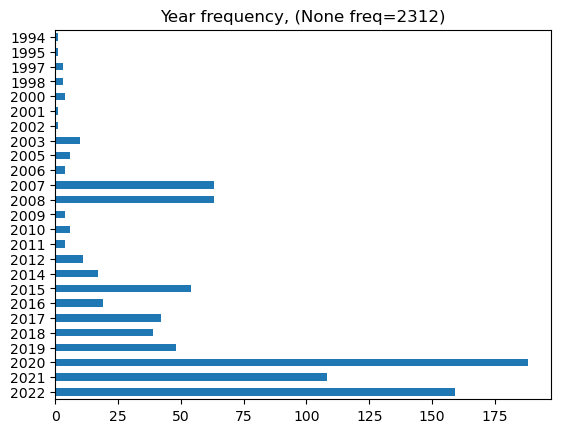

In [80]:
year_freq = wind_gdf.start_date.value_counts().sort_index(ascending=False)
year_freq[:-1].plot.barh(title=f'Year frequency, (None freq={year_freq[0]})');

Keep

In [81]:
wind_gdf['osm_type'].value_counts()

node    3046
way      125
Name: osm_type, dtype: int64

Keep

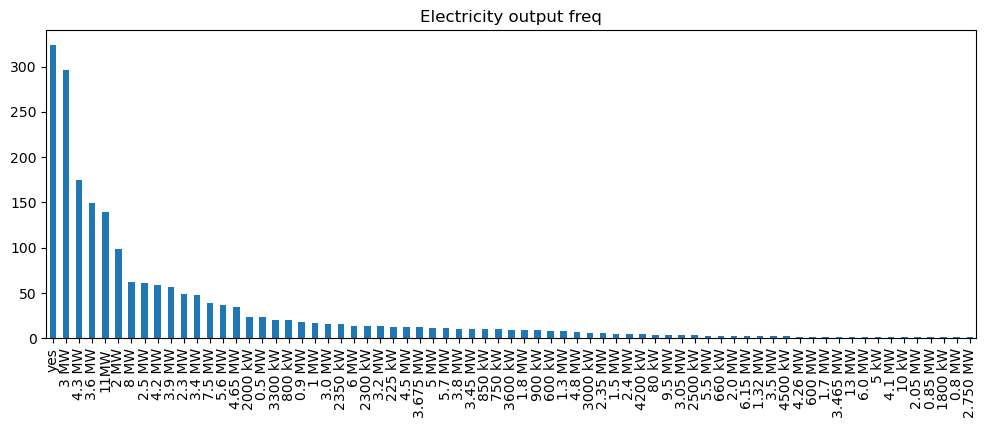

In [177]:
raw_wind_gdf['generator:output:electricity'].value_counts().plot.bar(figsize=(12, 4), title='Electricity output freq');

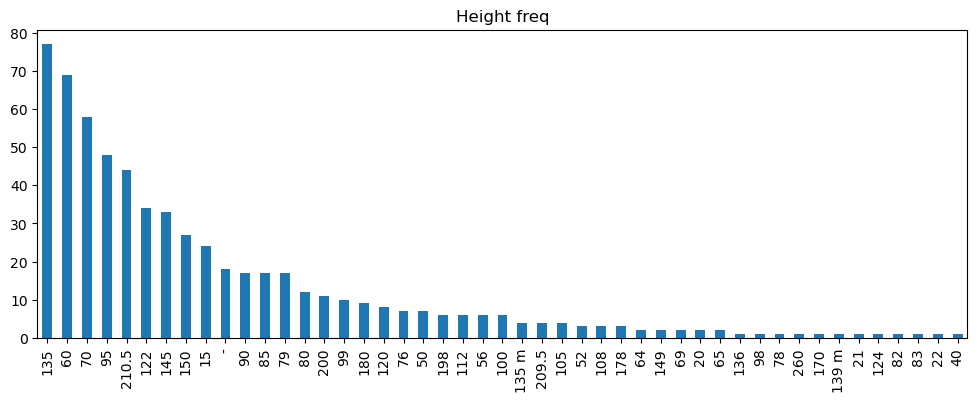

In [83]:
wind_gdf.height.value_counts().plot.bar(figsize=(12, 4), title='Height freq');

In order to perform analysis data cleaning needs to be applied on height, electricity and rotor diameter

Height

In [158]:
wind_gdf.height = raw_wind_gdf.height \
    .apply(lambda x: x.split(' ')[0] if x and x != '-' else '-1') \
    .replace('', '-1') \
    .replace('-1', None) \
    .astype(float)

Electricity output

In [172]:
def elec_unit_cleaner(data):
    mW = 1000
    to_return = None
    if data:
        if data == 'yes':
            to_return = '0'
        else:
            splitted = data.split(" ")
            if len(splitted) > 1:
                if splitted[-1] == 'kW':
                    to_return = f'{float(splitted[0]) / mW}'
                elif splitted[-1] == 'MW':
                    to_return = splitted[0]

    return to_return

In [178]:
wind_gdf['generator:output:electricity'] = raw_wind_gdf['generator:output:electricity'] \
    .apply(lambda x: elec_unit_cleaner(x)) \
    .astype(float)

Rotor diameter

In [191]:
wind_gdf['rotor:diameter'] = raw_wind_gdf['rotor:diameter'].apply(lambda x: x.split(' ')[0] if x and x.split(' ')[-1] == 'm' else x if x else None).astype(float)

## Height vs Electricity output

Does the height determine the electricity output?

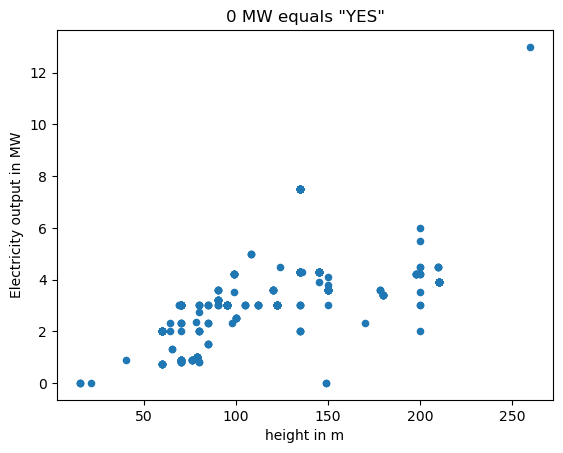

In [182]:
wind_gdf[['generator:output:electricity', 'height']].plot.scatter(x='height', y='generator:output:electricity', ylabel='Electricity output in MW', xlabel='height in m', title='0 MW equals "YES"');

Numerical value 0 reflects the 'YES' value within the raw data, currently there is no knowledge of the meaning. What can be seen is that the YES value occurs in low heights and h=150.

## Rotor diameter

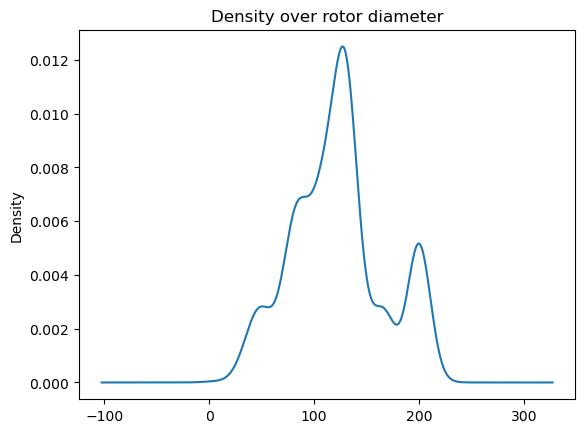

In [192]:
wind_gdf['rotor:diameter'].plot.kde(title='Density over rotor diameter');

## Electricity output vs Rotor diameter

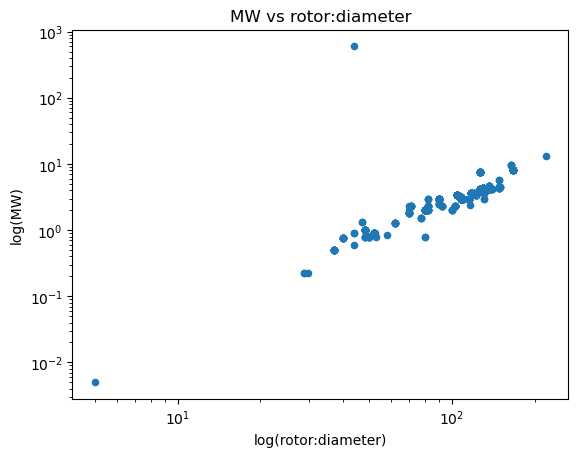

In [194]:
wind_gdf[['generator:output:electricity', 'rotor:diameter']].plot.scatter(x='rotor:diameter', y='generator:output:electricity', xlabel='log(rotor:diameter)', ylabel='log(MW)', title='MW vs rotor:diameter', logx=True, logy=True);

Conclusion, taking into account the missing values, the above graph shows the larger the diameter, the higher the electricity output

## TODO

Revisit and discuss the features in order to reduce the dimensionality of the data

## Store clean data

In [195]:
wind_gdf.to_parquet('../../data/solar_wind/nl_wind_geom_clean_CRS84.parquet')
solar_gdf.to_parquet('../../data/solar_wind/nl_solar_geom_clean_CRS84.parquet')